In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
# m = np.array([[1, 2], [2, 4]])
# np.linalg.matrix_rank(m)

In [80]:
path = "F:/for learn/Python_ML_and_Kaggle/Datasets/"
digits_train = pd.read_csv(path + "optdigits.csv", header=None)
x_digits = digits_train.loc[:, np.arange(64)]
y_digits = digits_train.loc[:, 64]

In [81]:
estimator = PCA(n_components=2)
x_pca = estimator.fit_transform(x_digits)

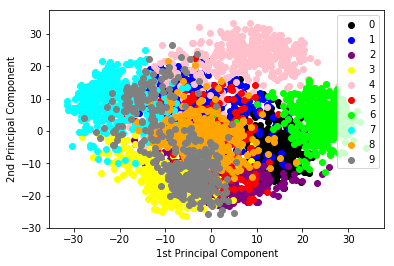

In [83]:
%matplotlib inline
def plot_pca_scatter():
    colors = ["black", "blue", "purple", "yellow", "pink", "red", "lime", "cyan", "orange", "gray"]
    for i in range(len(colors)):
        target_x = x_pca[y_digits == i]
        px = target_x[:, 0]
        py = target_x[:, 1]
        plt.scatter(px, py, c=colors[i])
    plt.legend(np.arange(0, 10).astype(str))
    plt.xlabel("1st Principal Component")
    plt.ylabel("2nd Principal Component")
    plt.show()
plot_pca_scatter()

In [62]:
# use PCA to help svc
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size=0.25, random_state=33)

In [59]:
estimator2 = PCA(n_components=20)
pca_x_train = estimator2.fit_transform(x_train)
pca_x_test = estimator2.transform(x_test)

In [65]:
for method in ["normal", "pca"]:
    obj = LinearSVC()
    if(method == "pca"):
        obj.fit(pca_x_train, y_train)
        y_predict = obj.predict(pca_x_test)
        score = obj.score(pca_x_test, y_test)
    else:
        obj.fit(x_train, y_train)
        y_predict = obj.predict(x_test)
        score = obj.score(x_test, y_test)
    print("the %s method of SVC:  " % method)
    print("ACC score is %f" % score)
    print(classification_report(y_true=y_test, y_pred=y_predict))

the normal method of SVC:  
ACC score is 0.948745
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       109
          1       0.95      0.86      0.90        98
          2       0.97      0.95      0.96        92
          3       0.96      0.93      0.95       114
          4       0.99      0.97      0.98        99
          5       0.92      0.96      0.94        96
          6       0.98      1.00      0.99        85
          7       1.00      0.98      0.99        86
          8       0.84      0.95      0.89        78
          9       0.88      0.93      0.91        99

avg / total       0.95      0.95      0.95       956

the pca method of SVC:  
ACC score is 0.936192
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       109
          1       0.95      0.94      0.94        98
          2       0.97      0.93      0.95        92
          3       0.97      0.93      0.95       11